In [8]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [9]:
path_to_folder = "nazrin_rachana_final/"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/nazrin_rachana_final


In [2]:
!pip install mujoco
!pip install mujoco_mjx
!pip install brax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.9 MB/s eta 0:00:00
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94506 sha256=5240ff1a09611e3b8f6541991c5120f7f68ef842fc82fe782fc3438f6f54cfa7
  Stored in directory: /root/.cache/pip/wheels/7b/89/c9/a9b8

In [3]:
from brax import base
from brax import math
from brax import envs
from brax.io import html, mjcf, model
from brax.envs.base import Env, PipelineEnv, State
from brax.base import Base, Motion, Transform
from brax.mjx.base import State as MjxState
from brax.training.agents.sac import train as sac
from brax.training.agents.ppo import train as ppo
from brax.training.agents.ppo import networks as ppo_networks
from brax.training.agents.sac import networks as sac_networks

from etils import epath
from datetime import datetime
from IPython.display import HTML
import functools
import jax
from jax import numpy as jp
import numpy as np
from typing import Any, Dict, Sequence, Tuple, Union
from matplotlib import pyplot as plt

from ml_collections import config_dict
import mujoco
from mujoco import mjx
from flax import struct

In [4]:
xml_content=""""
<mujoco model="barkour v0 scene">


  <compiler angle="radian" meshdir="assets" texturedir="assets" autolimits="true"/>

  <option timestep="0.002" iterations="1" ls_iterations="4">
    <flag eulerdamp="disable"/>
  </option>

  <statistic meansize="0.183574"/>

  <default>
    <geom contype="0" conaffinity="0" type="mesh"/>
    <joint range="-1.5708 1.5708" armature="0.01090125" damping="0.5239"/>
    <default class="abductor">
      <joint range="-1.0472 1.0472"/>
    </default>
    <default class="hip_front">
      <joint range="-1.22173 3.24631"/>
    </default>
    <default class="hip_hind">
      <joint range="-1.98968 2.46091"/>
    </default>
    <default class="knee">
      <joint range="0 2.5132" axis="0 -0.0775009 0.996992"/>
    </default>
    <default class="multi_mode_controlled_actuator">
      <general biastype="affine" gainprm="35 0 0 0 0 0 0 0 0 0" biasprm="0 -35 -0.65 0 0 0 0 0 0 0" forcerange="-18.0 18.0" ctrlrange="-2 2"/>
    </default>
    <default class="visual">
      <geom contype="0" conaffinity="0" density="0" group="1"/>
      <default class="visual_upper_right1">
        <geom rgba="0.768627 0.886275 0.952941 1"/>
      </default>
      <default class="visual_upper_right2">
        <geom rgba="0.972549 0.529412 0.00392157 1"/>
      </default>
      <default class="visual_abduction">
        <geom rgba="0.537255 0.854902 0.827451 1"/>
      </default>
      <default class="visual_foot">
        <geom rgba="0.301961 0.301961 0.301961 1"/>
      </default>
    </default>
    <default class="collision">
      <geom group="2"/>
      <default class="upper_right1">
        <geom rgba="0.768627 0.886275 0.952941 1"/>
      </default>
      <default class="upper_right2">
        <geom rgba="0.972549 0.529412 0.00392157 1"/>
      </default>
      <default class="abduction">
        <geom rgba="0.537255 0.854902 0.827451 1"/>
      </default>
      <default class="foot">
        <geom rgba="0.301961 0.301961 0.301961 1"/>
      </default>
    </default>
    <default class="lowerLegFootLeft">
      <geom type="sphere" pos="-0.191284 -0.0191638 -0.013" size="0.014" contype="1"
       conaffinity="0" rgba="1 0 0 1" solimp="0.015 1 0.031" friction="0.8 0.02 0.01"/>
      <site pos="-0.191284 -0.0191638 -0.013"/>
    </default>
    <default class="lowerLegFootRight">
      <geom type="sphere" pos="-0.191284 -0.0191638 0.013" size="0.014" contype="1"
       conaffinity="0" rgba="1 0 0 1" solimp="0.015 1 0.031" friction="0.8 0.02 0.01"/>
      <site pos="-0.191284 -0.0191638 0.013"/>
    </default>
  </default>

  <custom>
    <numeric data="0.0 0.0 0.21 1.0 0.0 0.0 0.0 0.0 0.5 1.0 0.0 0.5 1.0 0.0 0.5 1.0 0.0 0.5 1.0" name="init_qpos"/>
  </custom>

  <asset>
    <mesh file="head.stl"/>
    <mesh file="powercable.stl"/>
    <mesh file="handle.stl"/>
    <mesh file="head_mount.stl"/>
    <mesh file="body.stl"/>
    <mesh file="abduction.stl"/>
    <mesh file="upper_right_2.stl"/>
    <mesh file="upper_right_3.stl"/>
    <mesh file="upper_right_1.stl"/>
    <mesh file="lower_leg_1to1.stl"/>
    <mesh file="foot.stl"/>
    <mesh file="upper_left_2.stl"/>
    <mesh file="upper_left_1.stl"/>
    <mesh file="upper_left_3.stl"/>
  </asset>

  <worldbody>
    <site name="origin"/>
    <body name="chassis">
      <camera name="track" pos="0.846 -1.465 0.916" xyaxes="0.866 0.500 0.000 -0.171 0.296 0.940" mode="trackcom"/>
      <freejoint/>
      <inertial pos="0.0196226 -0.00015133 0.0611588" quat="0.000990813 0.68703 0.000216603 0.726628" mass="4.48878" diaginertia="0.071033 0.0619567 0.0192519"/>
      <geom class="visual" pos="-0.00448404 -0.000225838 0.0576402" rgba="0.647059 0.647059 0.647059 1" mesh="head"/>
      <geom class="visual" pos="-0.00448404 -0.000225838 0.0576402" rgba="0.768627 0.886275 0.952941 1" mesh="powercable"/>
      <geom class="visual" pos="-0.00448404 -0.000225838 0.0576402" rgba="0.917647 0.917647 0.917647 1" mesh="handle"/>
      <geom class="visual" pos="-0.00448404 -0.000225838 0.0576402" rgba="0.231373 0.380392 0.705882 1" mesh="head_mount"/>
      <geom class="visual" pos="-0.00448404 -0.000225838 0.0576402" rgba="0.984314 0.517647 0.862745 1" mesh="body"/>
      <body name="abduction_1" pos="0.130533 -0.056 0.0508" quat="1.30945e-06 0.161152 -2.13816e-07 0.98693">
        <inertial pos="-0.0521152 0.00350917 0.0171912" quat="0.387877 0.592262 0.592492 0.384358" mass="0.639437" diaginertia="0.000866008 0.000565866 0.000479767"/>
        <joint class="abductor" name="abduction_front_right" axis="-0.94806 0 0.318092"/>
        <geom class="visual_abduction" pos="-0.0540394 0.0217 0.0181312" mesh="abduction"/>
        <body name="upper_right_asm_1" pos="-0.0540394 0.0217 0.0181312" quat="0.284632 0.284629 -0.647292 0.647289">
          <inertial pos="-0.0253655 -0.0179374 -0.0465027" quat="-0.245689 0.639007 0.153351 0.712594" mass="0.942155" diaginertia="0.00539403 0.00519403 0.000795298"/>
          <joint class="hip_front" name="hip_front_right" axis="0 0 -1"/>
          <geom class="visual_upper_right2" mesh="upper_right_2"/>
          <geom class="visual_upper_right2" mesh="upper_right_3"/>
          <geom class="visual_upper_right1" mesh="upper_right_1"/>
          <body name="lower_leg_1to1_front_right" pos="-0.193523 -0.104637 -0.0792" quat="0.312742 -0.0121371 0.0368314 -0.949046">
            <inertial pos="-0.0577509 -0.0097034 0.0114624" quat="-0.047103 0.705359 -0.0102465 0.70721" mass="0.169623" diaginertia="0.000828741 0.000813964 3.49901e-05"/>
            <joint class="knee" name="knee_front_right"/>
            <geom class="visual" pos="0.00320019 0.0240604 -0.0141615" rgba="0.32549 0.529412 0.980392 1" mesh="lower_leg_1to1"/>
            <geom class="visual_foot" pos="0.00320019 0.0240604 -0.0141615" mesh="foot"/>
            <geom class="lowerLegFootRight"/>
            <site name="foot_front_right" class="lowerLegFootRight"/>
          </body>
        </body>
      </body>
      <body name="abduction_2" pos="0.130533 0.056 0.0508" quat="0.161152 1.09564e-06 0.98693 1.09564e-06">
        <inertial pos="-0.0521152 0.00350917 0.0171912" quat="0.387877 0.592262 0.592492 0.384358" mass="0.639437" diaginertia="0.000866008 0.000565866 0.000479767"/>
        <joint class="abductor" name="abduction_front_left" axis="0.94806 0 -0.318092"/>
        <geom class="visual_abduction" pos="-0.0540394 0.0217 0.0181312" mesh="abduction"/>
        <body name="upper_left_asm_1" pos="-0.0540394 0.0217 0.0181312" quat="0.671818 0.671821 0.220587 -0.220588">
          <inertial pos="0.0306562 0.00629189 -0.0466005" quat="-0.113342 0.751294 0.0555641 0.647784" mass="0.938791" diaginertia="0.00538157 0.00518445 0.000790347"/>
          <joint class="hip_front" name="hip_front_left" axis="0 0 1"/>
          <geom class="visual" rgba="0.980392 0.713725 0.00392157 1" mesh="upper_left_2"/>
          <geom class="visual" rgba="0.498039 0.498039 0.498039 1" mesh="upper_left_1"/>
          <geom class="visual" rgba="1 0.756863 0.054902 1" mesh="upper_left_3"/>
          <body name="lower_leg_1to1_front_left" pos="0.208835 0.0691954 -0.0792" quat="0.0386264 0.995249 0.0893024 0.0034659">
            <inertial pos="-0.0577509 -0.00780463 -0.0129639" quat="-0.047103 0.705359 -0.0102465 0.70721" mass="0.169623" diaginertia="0.000828741 0.000813964 3.49901e-05"/>
            <joint class="knee" name="knee_front_left"/>
            <geom class="visual" pos="0.00320019 0.0259591 -0.0385878" rgba="0.32549 0.529412 0.980392 1" mesh="lower_leg_1to1"/>
            <geom class="visual_foot" pos="0.00320019 0.0259591 -0.0385878" mesh="foot"/>
            <geom class="lowerLegFootLeft"/>
            <site name="foot_front_left" class="lowerLegFootLeft"/>
          </body>
        </body>
      </body>
      <body name="abduction_3" pos="-0.134667 -0.056 0.0508" quat="1.30945e-06 0.98693 2.13816e-07 -0.161152">
        <inertial pos="-0.0521152 0.00350917 0.0171912" quat="0.387877 0.592262 0.592492 0.384358" mass="0.639437" diaginertia="0.000866008 0.000565866 0.000479767"/>
        <joint class="abductor" name="abduction_hind_right" axis="0.94806 0 -0.318092"/>
        <geom class="visual_abduction" pos="-0.0540394 0.0217 0.0181312" mesh="abduction"/>
        <body name="upper_right_asm_2" pos="-0.0540394 0.0217 0.0181312" quat="0.64729 0.647292 0.28463 -0.284631">
          <inertial pos="-0.0253655 -0.0179374 -0.0465027" quat="-0.245689 0.639007 0.153351 0.712594" mass="0.942155" diaginertia="0.00539403 0.00519403 0.000795298"/>
          <joint class="hip_hind" name="hip_hind_right" axis="0 0 -1"/>
          <geom class="visual_upper_right2" mesh="upper_right_2"/>
          <geom class="visual_upper_right2" mesh="upper_right_3"/>
          <geom class="visual_upper_right1" mesh="upper_right_1"/>
          <body name="lower_leg_1to1_hind_right" pos="-0.193523 -0.104637 -0.0792" quat="0.312742 -0.0121371 0.0368314 -0.949046">
            <inertial pos="-0.0577509 -0.0097034 0.0114624" quat="-0.047103 0.705359 -0.0102465 0.70721" mass="0.169623" diaginertia="0.000828741 0.000813964 3.49901e-05"/>
            <joint class="knee" name="knee_hind_right"/>
            <geom class="visual" pos="0.00320019 0.0240604 -0.0141615" rgba="0.32549 0.529412 0.980392 1" mesh="lower_leg_1to1"/>
            <geom class="visual_foot" pos="0.00320019 0.0240604 -0.0141615" mesh="foot"/>
            <geom class="lowerLegFootRight"/>
            <site name="foot_hind_right" class="lowerLegFootRight"/>
          </body>
        </body>
      </body>
      <body name="abduction_4" pos="-0.134667 0.056 0.0508" quat="0.98693 0 -0.161152 0">
        <inertial pos="-0.0521152 0.00350917 0.0171912" quat="0.387877 0.592262 0.592492 0.384358" mass="0.639437" diaginertia="0.000866008 0.000565866 0.000479767"/>
        <joint class="abductor" name="abduction_hind_left" axis="-0.94806 0 0.318092"/>
        <geom class="visual_abduction" pos="-0.0540394 0.0217 0.0181312" mesh="abduction"/>
        <body name="upper_left_asm_2" pos="-0.0540394 0.0217 0.0181312" quat="-0.220587 -0.220588 0.67182 -0.671818">
          <inertial pos="0.0306562 0.00629189 -0.0466005" quat="-0.113342 0.751294 0.0555641 0.647784" mass="0.938791" diaginertia="0.00538157 0.00518445 0.000790347"/>
          <joint class="hip_hind" name="hip_hind_left" axis="0 0 1"/>
          <geom class="visual" rgba="0.498039 0.498039 0.498039 1" mesh="upper_left_1"/>
          <geom class="visual" rgba="1 0.756863 0.054902 1" mesh="upper_left_3"/>
          <geom class="visual" rgba="0.980392 0.713725 0.00392157 1" mesh="upper_left_2"/>
          <body name="lower_leg_1to1_hind_left" pos="0.208835 0.0691954 -0.0792" quat="0.0386264 0.995249 0.0893024 0.0034659">
            <inertial pos="-0.0577509 -0.00780463 -0.0129639" quat="-0.047103 0.705359 -0.0102465 0.70721" mass="0.169623" diaginertia="0.000828741 0.000813964 3.49901e-05"/>
            <joint class="knee" name="knee_hind_left"/>
            <geom class="visual" pos="0.00320019 0.0259591 -0.0385878" rgba="0.32549 0.529412 0.980392 1" mesh="lower_leg_1to1"/>
            <geom class="visual_foot" pos="0.00320019 0.0259591 -0.0385878" mesh="foot"/>
            <geom class="lowerLegFootLeft"/>
            <site name="foot_hind_left" class="lowerLegFootLeft"/>
          </body>
        </body>
      </body>
    </body>
  </worldbody>

  <actuator>
    <general name="abduction_front_left" class="multi_mode_controlled_actuator" joint="abduction_front_left"/>
    <general name="hip_front_left" class="multi_mode_controlled_actuator" joint="hip_front_left"/>
    <general name="knee_front_left" class="multi_mode_controlled_actuator" joint="knee_front_left"/>
    <general name="abduction_hind_left" class="multi_mode_controlled_actuator" joint="abduction_hind_left"/>
    <general name="hip_hind_left" class="multi_mode_controlled_actuator" joint="hip_hind_left"/>
    <general name="knee_hind_left" class="multi_mode_controlled_actuator" joint="knee_hind_left"/>
    <general name="abduction_front_right" class="multi_mode_controlled_actuator" joint="abduction_front_right"/>
    <general name="hip_front_right" class="multi_mode_controlled_actuator" joint="hip_front_right"/>
    <general name="knee_front_right" class="multi_mode_controlled_actuator" joint="knee_front_right"/>
    <general name="abduction_hind_right" class="multi_mode_controlled_actuator" joint="abduction_hind_right"/>
    <general name="hip_hind_right" class="multi_mode_controlled_actuator" joint="hip_hind_right"/>
    <general name="knee_hind_right" class="multi_mode_controlled_actuator" joint="knee_hind_right"/>
  </actuator>

  <sensor>
    <jointpos joint="abduction_front_left" name="abduction_front_left_pos"/>
    <jointpos joint="hip_front_left" name="hip_front_left_pos"/>
    <jointpos joint="knee_front_left" name="knee_front_left_pos"/>
    <jointpos joint="abduction_hind_left" name="abduction_hind_left_pos"/>
    <jointpos joint="hip_hind_left" name="hip_hind_left_pos"/>
    <jointpos joint="knee_hind_left" name="knee_hind_left_pos"/>
    <jointpos joint="abduction_front_right" name="abduction_front_right_pos"/>
    <jointpos joint="hip_front_right" name="hip_front_right_pos"/>
    <jointpos joint="knee_front_right" name="knee_front_right_pos"/>
    <jointpos joint="abduction_hind_right" name="abduction_hind_right_pos"/>
    <jointpos joint="hip_hind_right" name="hip_hind_right_pos"/>
    <jointpos joint="knee_hind_right" name="knee_hind_right_pos"/>
    <jointvel joint="abduction_front_left" name="abduction_front_left_vel"/>
    <jointvel joint="hip_front_left" name="hip_front_left_vel"/>
    <jointvel joint="knee_front_left" name="knee_front_left_vel"/>
    <jointvel joint="abduction_hind_left" name="abduction_hind_left_vel"/>
    <jointvel joint="hip_hind_left" name="hip_hind_left_vel"/>
    <jointvel joint="knee_hind_left" name="knee_hind_left_vel"/>
    <jointvel joint="abduction_front_right" name="abduction_front_right_vel"/>
    <jointvel joint="hip_front_right" name="hip_front_right_vel"/>
    <jointvel joint="knee_front_right" name="knee_front_right_vel"/>
    <jointvel joint="abduction_hind_right" name="abduction_hind_right_vel"/>
    <jointvel joint="hip_hind_right" name="hip_hind_right_vel"/>
    <jointvel joint="knee_hind_right" name="knee_hind_right_vel"/>
    <gyro site="origin" name="gyro"/>
    <accelerometer site="origin" name="accelerometer"/>
    <framequat objtype="site" objname="origin" name="orientation"/>
  </sensor>

  <keyframe>
    <key name="standing" qpos="0 0 0.21 1 0 0 0 0 0.5 1.0 0 0.5 1.0 0 0.5 1.0 0 0.5 1.0"
      ctrl="0 0.5 1.0 0 0.5 1.0 0 0.5 1.0 0 0.5 1.0"/>
  </keyframe>

  <keyframe>
    <key name="home" qpos="0 0 0.21 1 0 0 0 0 0.5 1.0 0 0.5 1.0 0 0.5 1.0 0 0.5 1.0"
      ctrl="0 0.5 1.0 0 0.5 1.0 0 0.5 1.0 0 0.5 1.0"/>
  </keyframe>


  <statistic center="0 0 0.3" extent="1.2"/>

  <visual>
    <headlight diffuse="0.6 0.6 0.6" ambient="0.3 0.3 0.3" specular="0 0 0"/>
    <rgba haze="0.15 0.25 0.35 1"/>
    <global azimuth="120" elevation="-20"/>
  </visual>

  <asset>
    <texture type="skybox" builtin="gradient" rgb1="0.3 0.5 0.7" rgb2="0 0 0" width="512" height="3072"/>
    <texture type="2d" name="groundplane" builtin="checker" mark="edge" rgb1="0.2 0.3 0.4" rgb2="0.1 0.2 0.3"
      markrgb="0.8 0.8 0.8" width="300" height="300"/>
    <material name="groundplane" texture="groundplane" texuniform="true" texrepeat="5 5" reflectance="0.2"/>
  </asset>

  <worldbody>
    <light pos="0 0 1.5" dir="0 0 -1" directional="true"/>
    <camera name="default" pos="0.846 -1.465 0.916" xyaxes="0.866 0.500 0.000 -0.171 0.296 0.940"/>
    <geom name="floor" size="0 0 0.05" type="plane" material="groundplane" conaffinity="1"/>
  </worldbody>
</mujoco>
"""

In [5]:
import time
import itertools
import numpy as np
from typing import Callable, NamedTuple, Optional, Union, List
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True, linewidth=100)

In [6]:
# to define a function for the reward configurartion
def get_reward_config():

  def get_default_rewards():
    default_config = config_dict.ConfigDict(
        dict(
            scales=config_dict.ConfigDict(
                dict(
                    xy_lin_vel=2, # Reward linear velocity for xy axis.
                    z_ang_vel=1,  # Reward angular velocity for z axis.
                    z_lin_vel=-1.5, #Punish linear velocity for z axis.
                    xy_ang_vel=-0.5, #Punish the base roll and pitch rate.
                    torques=-0.0002, # Maintaining Torrques.
                    orientation=-5.0, # Disallow non-zero roll and pitch angles.
                    feet_in_air_time=0.2, # Encourage long swing steps.
                    action_rate=-0.01, # Disallow the change in the action and encourage smooth actions.
                    no_motion=-0.5,  # Encourage no motion at zero command.
                    termination=-1.0, # Early termination penalty.
                    feet_slip=-0.1,  # Disallow foot slipping on the ground.
                )
            ),
            tracking_sigma=0.25,
        )
    )
    return default_config

  default_config = config_dict.ConfigDict(
      dict(
          rewards=get_default_rewards(),
      )
  )

  return default_config


class Barkour_v_Env(PipelineEnv):
 # Barkour V0 environment for training on policies

  def __init__(
      self,
      obs_noise: float = 0.05,
      action_scale: float = 0.3,
      kick_vel: float = 0.05,
      **kwargs,
  ):

    mj_model = mujoco.MjModel.from_xml_string(xml_content)
    sys = mjcf.load_model(mj_model)
    self._dt = 0.02  # this environment is 50 fps
    sys = sys.tree_replace({'opt.timestep': 0.004, 'dt': 0.004})

    # overwrite menagerie provided params for efficient policy
    sys = sys.replace(
        dof_damping=sys.dof_damping.at[6:].set(0.5239),
        actuator_gainprm=sys.actuator_gainprm.at[:, 0].set(35.0),
        actuator_biasprm=sys.actuator_biasprm.at[:, 1].set(-35.0),
    )

    n_frames = kwargs.pop('n_frames', int(self._dt / sys.opt.timestep))
    super().__init__(sys, backend='mjx', n_frames=n_frames)

    self.reward_config = get_reward_config()


    for k, v in kwargs.items():

      if k.endswith('_scale'):
        self.reward_config.rewards.scales[k[:-6]] = v

    self._torso_idx = mujoco.mj_name2id(
        sys.mj_model, mujoco.mjtObj.mjOBJ_BODY.value, 'torso'
    )
    self._action_scale = action_scale
    self._obs_noise = obs_noise
    self._kick_vel = kick_vel
    self._init_q = jp.array(sys.mj_model.keyframe('home').qpos)
    self._default_pose = sys.mj_model.keyframe('home').qpos[7:]
    self.lowers = jp.array([-0.7, -1.0, 0.05] * 4)
    self.uppers = jp.array([0.52, 2.1, 2.1] * 4)
    feet_site = [
        'foot_front_left',
        'foot_hind_left',
        'foot_front_right',
        'foot_hind_right',
    ]
    feet_site_id = [
        mujoco.mj_name2id(sys.mj_model, mujoco.mjtObj.mjOBJ_SITE.value, f)
        for f in feet_site
    ]
    assert not any(id_ == -1 for id_ in feet_site_id), 'Site not found.'
    self._feet_site_id = np.array(feet_site_id)
    lower_leg_body = [
        'lower_leg_1to1_front_left',
        'lower_leg_1to1_hind_left',
        'lower_leg_1to1_front_right',
        'lower_leg_1to1_hind_right',
    ]
    lower_leg_body_id = [
        mujoco.mj_name2id(sys.mj_model, mujoco.mjtObj.mjOBJ_BODY.value, l)
        for l in lower_leg_body
    ]
    assert not any(id_ == -1 for id_ in lower_leg_body_id), 'Body not found.'
    self._lower_leg_body_id = np.array(lower_leg_body_id)
    self._foot_radius = 0.0175
    self._nv = sys.nv

  def random_cmd(self, rng: jax.Array) -> jax.Array:
    # In the format of [minimum, maximum].
    lin_vel_x = [-0.6, 1.5]  # in m/s
    lin_vel_y = [-0.8, 0.8]  # in m/s
    ang_vel_yaw = [-0.7, 0.7]  # in rad/s

    _, key1, key2, key3 = jax.random.split(rng, 4)
    lin_vel_x = jax.random.uniform(
        key1, (1,), minval=lin_vel_x[0], maxval=lin_vel_x[1]
    )
    lin_vel_y = jax.random.uniform(
        key2, (1,), minval=lin_vel_y[0], maxval=lin_vel_y[1]
    )
    ang_vel_yaw = jax.random.uniform(
        key3, (1,), minval=ang_vel_yaw[0], maxval=ang_vel_yaw[1]
    )
    new_cmd = jp.array([lin_vel_x[0], lin_vel_y[0], ang_vel_yaw[0]])
    return new_cmd

  def reset(self, rng: jax.Array) -> State:
    rng, key = jax.random.split(rng)

    pipeline_state = self.pipeline_init(self._init_q, jp.zeros(self._nv))

    state_info = {
        'rng': rng,
        'last_act': jp.zeros(12),
        'last_vel': jp.zeros(12),
        'command': self.random_cmd(key),
        'last_contact': jp.zeros(4, dtype=bool),
        'feet_in_air_time': jp.zeros(4),
        'rewards': {k: 0.0 for k in self.reward_config.rewards.scales.keys()},
        'kick': jp.array([0.0, 0.0]),
        'step': 0,
    }

    obs_history = jp.zeros(15 * 31)  # store 15 steps of history
    obs = self._get_obs(pipeline_state, state_info, obs_history)
    reward, done = jp.zeros(2)
    metrics = {'total_dist': 0.0}
    for k in state_info['rewards']:
      metrics[k] = state_info['rewards'][k]
    state = State(pipeline_state, obs, reward, done, metrics, state_info)  # pytype: disable=wrong-arg-types
    return state

  def step(self, state: State, action: jax.Array) -> State:  # pytype: disable=signature-mismatch
    rng, cmd_rng, kick_noise_2 = jax.random.split(state.info['rng'], 3)

    # kick
    push_interval = 10
    kick_theta = jax.random.uniform(kick_noise_2, maxval=2 * jp.pi)
    kick = jp.array([jp.cos(kick_theta), jp.sin(kick_theta)])
    kick *= jp.mod(state.info['step'], push_interval) == 0
    qvel = state.pipeline_state.qvel  # pytype: disable=attribute-error
    qvel = qvel.at[:2].set(kick * self._kick_vel + qvel[:2])
    state = state.tree_replace({'pipeline_state.qvel': qvel})

    # physics step
    motor_targets = self._default_pose + action * self._action_scale
    motor_targets = jp.clip(motor_targets, self.lowers, self.uppers)
    pipeline_state = self.pipeline_step(state.pipeline_state, motor_targets)
    x, xd = pipeline_state.x, pipeline_state.xd

    # observation data
    obs = self._get_obs(pipeline_state, state.info, state.obs)
    joint_angles = pipeline_state.q[7:]
    joint_vel = pipeline_state.qd[6:]

    # foot contact data based on z-position
    foot_pos = pipeline_state.site_xpos[self._feet_site_id]  # pytype: disable=attribute-error
    foot_contact_z = foot_pos[:, 2] - self._foot_radius
    contact = foot_contact_z < 1e-3  # a mm or less off the floor
    contact_filt_mm = contact | state.info['last_contact']
    contact_filt_cm = (foot_contact_z < 3e-2) | state.info['last_contact']
    first_contact = (state.info['feet_in_air_time'] > 0) * contact_filt_mm
    state.info['feet_in_air_time'] += self.dt

    # done if joint limits are reached or robot is falling
    up = jp.array([0.0, 0.0, 1.0])
    done = jp.dot(math.rotate(up, x.rot[self._torso_idx - 1]), up) < 0
    done |= jp.any(joint_angles < self.lowers)
    done |= jp.any(joint_angles > self.uppers)
    done |= pipeline_state.x.pos[self._torso_idx - 1, 2] < 0.18

    # reward
    rewards = {
        'xy_lin_vel': (
            self._reward_xy_lin_vel(state.info['command'], x, xd)
        ),
        'z_ang_vel': (
            self._reward_z_ang_vel(state.info['command'], x, xd)
        ),
        'z_lin_vel': self._reward_z_lin_vel(xd),
        'xy_ang_vel': self._reward_xy_ang_vel(xd),
        'orientation': self._reward_orientation(x),
        'torques': self._reward_torques(pipeline_state.qfrc_actuator),  # pytype: disable=attribute-error
        'action_rate': self._reward_action_rate(action, state.info['last_act']),
        'no_motion': self._reward_no_motion(
            state.info['command'], joint_angles,
        ),
        'feet_in_air_time': self._reward_feet_in_air_time(
            state.info['feet_in_air_time'],
            first_contact,
            state.info['command'],
        ),
        'feet_slip': self._reward_feet_slip(pipeline_state, contact_filt_cm),
        'termination': self._reward_termination(done, state.info['step']),
    }
    rewards = {
        k: v * self.reward_config.rewards.scales[k] for k, v in rewards.items()
    }
    reward = jp.clip(sum(rewards.values()) * self.dt, 0.0, 10000.0)

    # state management
    state.info['kick'] = kick
    state.info['last_act'] = action
    state.info['last_vel'] = joint_vel
    state.info['feet_in_air_time'] *= ~contact_filt_mm
    state.info['last_contact'] = contact
    state.info['rewards'] = rewards
    state.info['step'] += 1
    state.info['rng'] = rng

    # sample new command if more than 500 timesteps achieved
    state.info['command'] = jp.where(
        state.info['step'] > 500,
        self.random_cmd(cmd_rng),
        state.info['command'],
    )
    # reset the step counter when done
    state.info['step'] = jp.where(
        done | (state.info['step'] > 500), 0, state.info['step']
    )

    # log total displacement as a proxy metric
    state.metrics['total_dist'] = math.normalize(x.pos[self._torso_idx - 1])[1]
    state.metrics.update(state.info['rewards'])

    done = jp.float32(done)
    state = state.replace(
        pipeline_state=pipeline_state, obs=obs, reward=reward, done=done
    )
    return state

  def _get_obs(
      self,
      pipeline_state: base.State,
      state_info: dict[str, Any],
      obs_history: jax.Array,
  ) -> jax.Array:
    inv_torso_rot = math.quat_inv(pipeline_state.x.rot[0])
    local_rpyrate = math.rotate(pipeline_state.xd.ang[0], inv_torso_rot)

    obs = jp.concatenate([
        jp.array([local_rpyrate[2]]) * 0.25,                 # yaw rate
        math.rotate(jp.array([0, 0, -1]), inv_torso_rot),    # projected gravity
        state_info['command'] * jp.array([2.0, 2.0, 0.25]),  # command
        pipeline_state.q[7:] - self._default_pose,           # motor angles
        state_info['last_act'],                              # last action
    ])

    obs = jp.clip(obs, -100.0, 100.0) + self._obs_noise * jax.random.uniform(
        state_info['rng'], obs.shape, minval=-1, maxval=1
    )
    obs = jp.roll(obs_history, obs.size).at[:obs.size].set(obs)

    return obs

  def _reward_z_lin_vel(self, xd: Motion) -> jax.Array:
    return jp.square(xd.vel[0, 2])

  def _reward_xy_ang_vel(self, xd: Motion) -> jax.Array:
    return jp.sum(jp.square(xd.ang[0, :2]))

  def _reward_orientation(self, x: Transform) -> jax.Array:
    up = jp.array([0.0, 0.0, 1.0])
    rot_up = math.rotate(up, x.rot[0])
    return jp.sum(jp.square(rot_up[:2]))

  def _reward_torques(self, torques: jax.Array) -> jax.Array:
    return jp.sqrt(jp.sum(jp.square(torques))) + jp.sum(jp.abs(torques))

  def _reward_action_rate(
      self, act: jax.Array, last_act: jax.Array
  ) -> jax.Array:
    return jp.sum(jp.square(act - last_act))

  def _reward_xy_lin_vel(
      self, commands: jax.Array, x: Transform, xd: Motion
  ) -> jax.Array:
    local_vel = math.rotate(xd.vel[0], math.quat_inv(x.rot[0]))
    lin_vel_error = jp.sum(jp.square(commands[:2] - local_vel[:2]))
    lin_vel_reward = jp.exp(
        -lin_vel_error / self.reward_config.rewards.tracking_sigma
    )
    return lin_vel_reward

  def _reward_z_ang_vel(
      self, commands: jax.Array, x: Transform, xd: Motion
  ) -> jax.Array:
    base_ang_vel = math.rotate(xd.ang[0], math.quat_inv(x.rot[0]))
    ang_vel_error = jp.square(commands[2] - base_ang_vel[2])
    return jp.exp(-ang_vel_error / self.reward_config.rewards.tracking_sigma)

  def _reward_feet_in_air_time(
      self, air_time: jax.Array, first_contact: jax.Array, commands: jax.Array
  ) -> jax.Array:
    # Reward air time.
    rew_air_time = jp.sum((air_time - 0.1) * first_contact)
    rew_air_time *= (
        math.normalize(commands[:2])[1] > 0.05
    )
    return rew_air_time

  def _reward_no_motion(
      self,
      commands: jax.Array,
      joint_angles: jax.Array,
  ) -> jax.Array:
    return jp.sum(jp.abs(joint_angles - self._default_pose)) * (
        math.normalize(commands[:2])[1] < 0.1
    )

  def _reward_feet_slip(
      self, pipeline_state: base.State, contact_filt: jax.Array
  ) -> jax.Array:
    # get velocities at feet which are offset from lower legs
    # pytype: disable=attribute-error
    pos = pipeline_state.site_xpos[self._feet_site_id]  # feet position
    feet_offset = pos - pipeline_state.xpos[self._lower_leg_body_id]
    # pytype: enable=attribute-error
    offset = base.Transform.create(pos=feet_offset)
    foot_indices = self._lower_leg_body_id - 1  # we got rid of the world body
    foot_vel = offset.vmap().do(pipeline_state.xd.take(foot_indices)).vel

    # Penalize large feet velocity for feet that are in contact with the ground.
    return jp.sum(jp.square(foot_vel[:, :2]) * contact_filt.reshape((-1, 1)))

  def _reward_termination(self, done: jax.Array, step: jax.Array) -> jax.Array:
    return done & (step < 500)

  def render(
      self, trajectory: List[base.State], camera: str | None = None
  ) -> Sequence[np.ndarray]:
    camera = camera or 'track'
    return super().render(trajectory, camera=camera)

envs.register_environment('barkour_v0', Barkour_v_Env)

In [10]:
environment_name = 'barkour_v0'
env = envs.get_environment(environment_name)

/usr/local/lib/python3.10/dist-packages/brax/io/mjcf.py:344: DeprecationWarning: jax.tree_map is deprecated: use jax.tree.map (jax v0.4.25 or newer) or jax.tree_util.tree_map (any JAX version).
  link = jax.tree_map(lambda x: x[1:].copy(), link)


In [11]:
def domain_randomize(sys, rng):
  """Randomizes the mjx.Model."""
  @jax.vmap
  def rand(rng):
    _, key = jax.random.split(rng, 2)
    friction = jax.random.uniform(key, (1,), minval=0.6, maxval=1.4)
    friction = sys.geom_friction.at[:, 0].set(friction)
    _, key = jax.random.split(key, 2)
    gain_range = (-5, 5)
    param = jax.random.uniform(
        key, (1,), minval=gain_range[0], maxval=gain_range[1]
    ) + sys.actuator_gainprm[:, 0]
    gain = sys.actuator_gainprm.at[:, 0].set(param)
    bias = sys.actuator_biasprm.at[:, 1].set(-param)
    return friction, gain, bias

  friction, gain, bias = rand(rng)

  in_axes = jax.tree_util.tree_map(lambda x: None, sys)
  in_axes = in_axes.tree_replace({
      'geom_friction': 0,
      'actuator_gainprm': 0,
      'actuator_biasprm': 0,
  })

  sys = sys.tree_replace({
      'geom_friction': friction,
      'actuator_gainprm': gain,
      'actuator_biasprm': bias,
  })

  return sys, in_axes
def progress(num_steps, metrics):
  times.append(datetime.now())
  x_data.append(num_steps)
  y_data.append(metrics['eval/episode_reward'])
  ydataerr.append(metrics['eval/episode_reward_std'])

  plt.xlim([0, train_fn.keywords['num_timesteps'] * 1.25])
  plt.ylim([min_y, max_y])

  plt.xlabel('# environment steps')
  plt.ylabel('reward per episode')
  plt.title(f'y={y_data[-1]:.3f}')

  plt.errorbar(
      x_data, y_data, yerr=ydataerr)
  plt.show()

/usr/local/lib/python3.10/dist-packages/brax/envs/wrappers/training.py:130: DeprecationWarning: jax.tree_map is deprecated: use jax.tree.map (jax v0.4.25 or newer) or jax.tree_util.tree_map (any JAX version).
  pipeline_state = jax.tree_map(


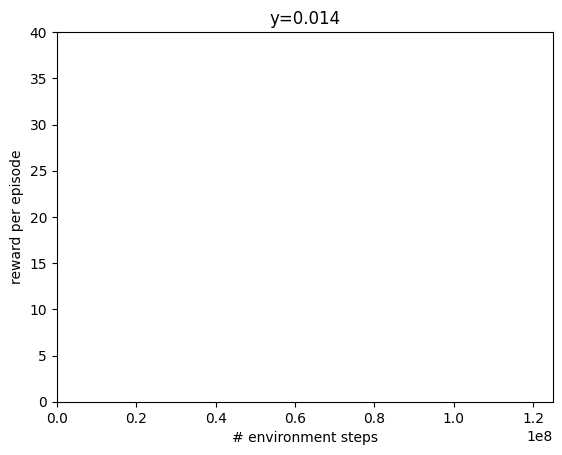

/usr/local/lib/python3.10/dist-packages/brax/envs/wrappers/training.py:130: DeprecationWarning: jax.tree_map is deprecated: use jax.tree.map (jax v0.4.25 or newer) or jax.tree_util.tree_map (any JAX version).
  pipeline_state = jax.tree_map(


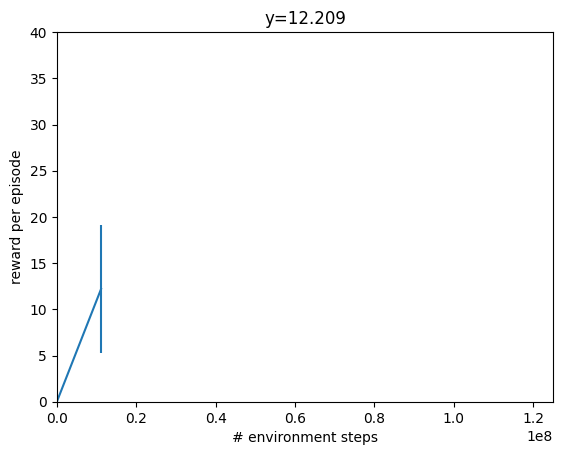

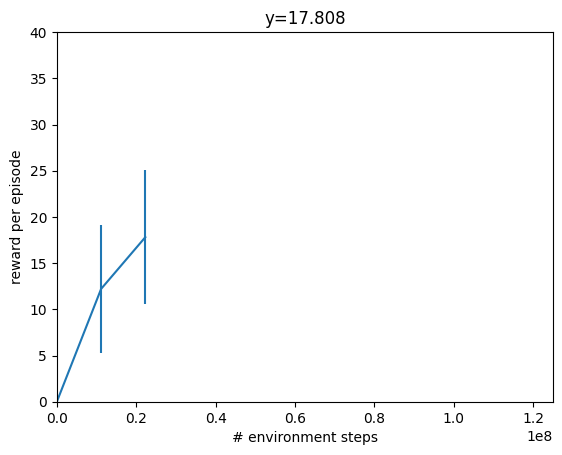

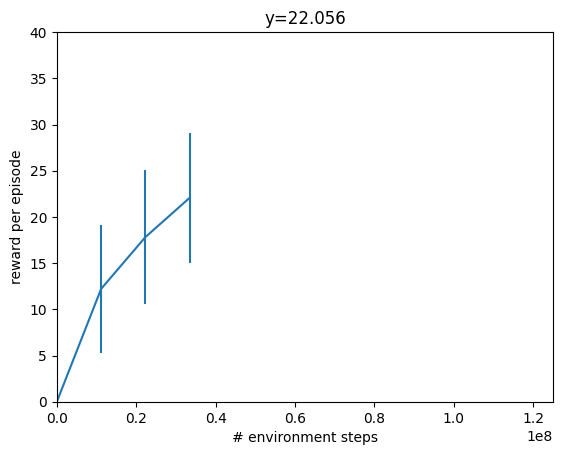

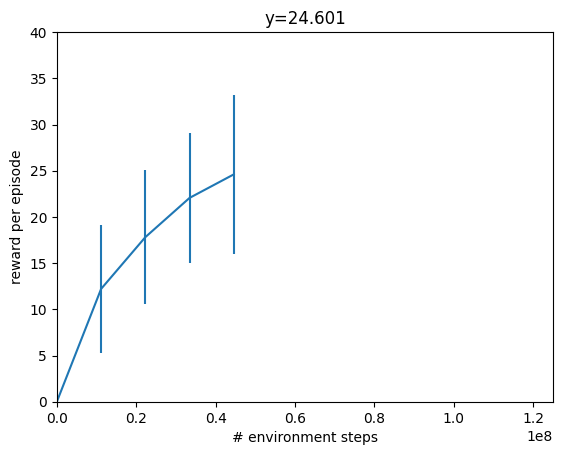

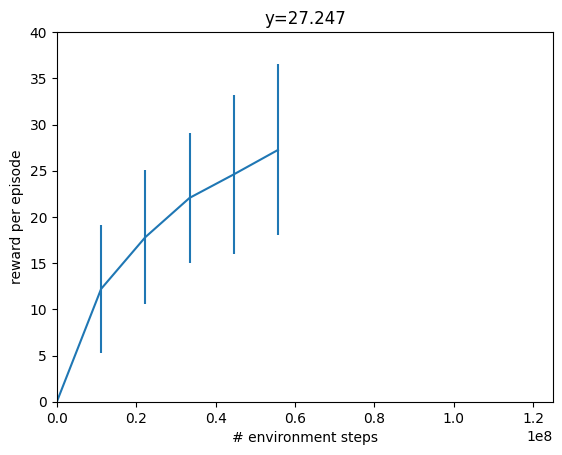

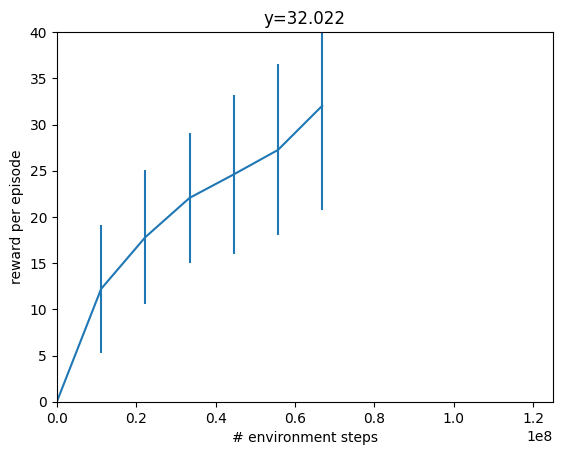

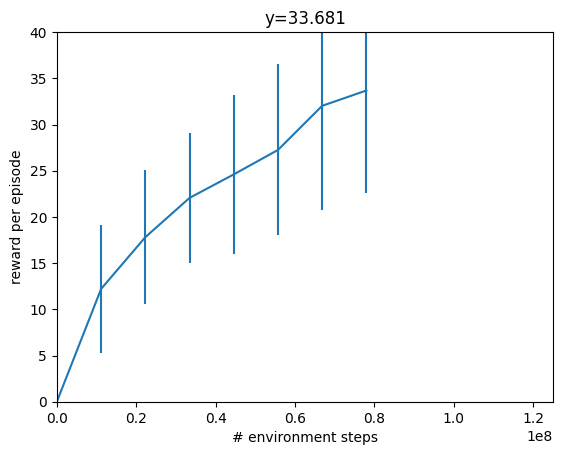

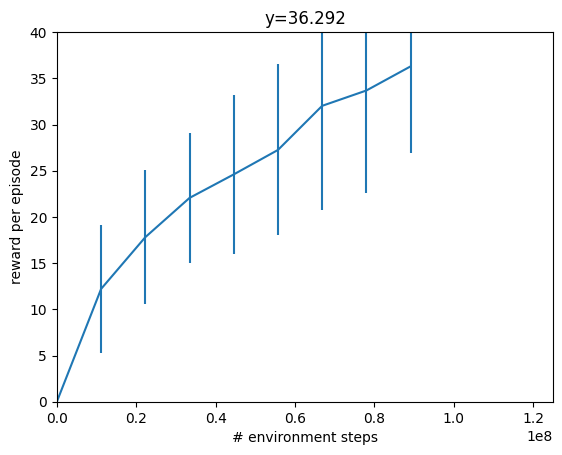

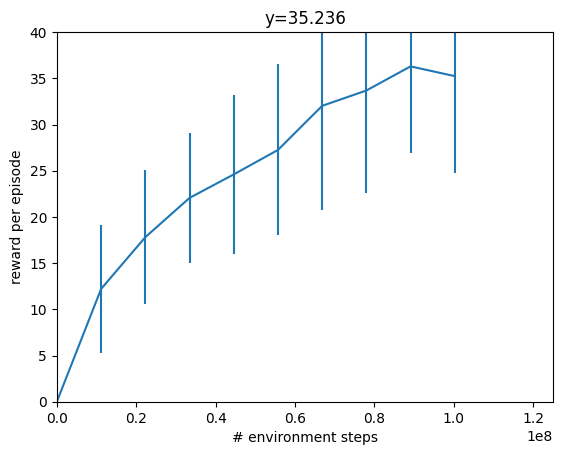

time to jit: 0:00:39.066702
time to train: 0:07:53.610619


In [12]:
 make_networks_factory = functools.partial(
    ppo_networks.make_ppo_networks,
        policy_hidden_layer_sizes=(125, 125, 125, 125))
train_fn = functools.partial(
      ppo.train, num_timesteps=100_000_000, num_evals=10,
      reward_scaling=1, episode_length=1000, normalize_observations=True,
      action_repeat=1, unroll_length=20, num_minibatches=64,
      num_updates_per_batch=4, discounting=0.97, learning_rate=3.0e-4,
      entropy_cost=1e-2, num_envs=4096, batch_size=512,
      network_factory=make_networks_factory,
      randomization_fn=domain_randomize, seed=0)

x_data = []
y_data = []
ydataerr = []
times = [datetime.now()]
max_y, min_y = 40, 0

# Reset environments since internals may be overwritten by tracers from the
# domain randomization function.
env = envs.get_environment(environment_name)
eval_env = envs.get_environment(environment_name)
make_inference_fn, parameters, _= train_fn(environment=env,
                                       progress_fn=progress,
                                       eval_env=eval_env)

print(f'time to jit: {times[1] - times[0]}')
print(f'time to train: {times[-1] - times[1]}')

In [13]:
model_path = 'barkour_v0_ppo_policy'
model.save_params(model_path, parameters)


In [14]:
parameters = model.load_params(model_path)
inference_fn = make_inference_fn(parameters)
jit_inference_fn = jax.jit(inference_fn)
evaluated_env = envs.get_environment(environment_name)

jit_reset = jax.jit(evaluated_env.reset)
jit_step = jax.jit(evaluated_env.step)

/usr/local/lib/python3.10/dist-packages/brax/io/mjcf.py:344: DeprecationWarning: jax.tree_map is deprecated: use jax.tree.map (jax v0.4.25 or newer) or jax.tree_util.tree_map (any JAX version).
  link = jax.tree_map(lambda x: x[1:].copy(), link)


In [15]:
linear_velocity_x = 1.0
linear_velocity_y = 1.0
linear_velocity_y = 0

command = jp.array([linear_velocity_x, linear_velocity_y, linear_velocity_y])

# initialize the state
random_seed = jax.random.PRNGKey(0)
initial_state = jit_reset(random_seed)
initial_state.info['command'] = command
trajectory = [initial_state.pipeline_state]

# Generate a trajectory
num_steps = 1000
render_interval = 2

for step in range(num_steps):
    action_rng, random_seed = jax.random.split(random_seed)
    control, _ = jit_inference_fn(initial_state.obs, action_rng)
    initial_state = jit_step(initial_state, control)
    trajectory.append(initial_state.pipeline_state)

In [16]:
HTML(html.render(evaluated_env.sys.replace(dt=evaluated_env.dt), rollout))

Output hidden; open in https://colab.research.google.com to view.